# Data Cleaning and verifying

### Import relevant packages

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
df = pd.read_csv('final.csv',parse_dates=['date'])
df.head()

,date,so2,no2,rspm,spm,location_monitoring_station
0,2005-01-04,10.9,62.9,203.0,384.0,Mayapuri
1,2005-01-05,25.1,64.1,381.0,601.0,Mayapuri
2,2005-01-14,15.9,58.1,217.0,479.0,Mayapuri
3,2005-01-15,17.5,77.8,246.0,558.0,Mayapuri
4,2005-01-18,8.5,70.0,306.0,574.0,Mayapuri


### Groupby date

Here in the dataset, there is recordings of concentration of various parts in Delhi on the same day. Thus this will make it difficult for us in many computations. So to overcome this, in this step, the *data is grouped by date* and the concentration value is filled with *mean of all the values of that particular date*. 

In [3]:
df.groupby(by='date').agg({'no2':'mean','so2':'mean','spm':'mean','rspm':'mean','location_monitoring_station':'sum'}).reset_index()

,date,no2,so2,spm,rspm,location_monitoring_station
0,2004-01-01,NaN,NaN,398.0,238.330000,JanakpuriShahdara
1,2004-01-02,NaN,NaN,346.5,182.915000,Siri FortAshok Vihar
2,2004-01-05,NaN,NaN,340.0,160.000000,NizamuddinShahzada Bagh
3,2004-01-06,NaN,NaN,283.5,141.335000,JanakpuriShahdara
4,2004-01-07,NaN,NaN,259.0,120.170000,Siri FortAshok Vihar
...,...,...,...,...,...,...
2559,2015-12-23,56.000000,4.000000,NaN,140.000000,JanakpuriShahdara
2560,2015-12-28,53.000000,4.000000,NaN,205.000000,Pritampura
2561,2015-12-29,74.500000,11.000000,NaN,239.250000,N.Y. SchoolNizamuddinShahzada BaghPritampura
2562,2015-12-30,94.333333,15.333333,NaN,306.500000,N.Y. SchoolSiri FortJanakpuriShahzada Bagh


### Filling missing dates

As we can see there are many dates missing in the dataset. So to overcome this problem, the dataset is resampled and the cell is filled with the mean

In [4]:
df = df.set_index('date')
df = df.resample('D').mean()

### Filling missing values

In [5]:
no2 = df['no2'].resample('Y', how='mean')
so2 = df['so2'].resample('Y', how='mean')
rspm = df['rspm'].resample('Y', how='mean')
spm = df['spm'].resample('Y', how='mean')

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


In [6]:
no2

date
2004-12-31          NaN
2005-12-31    49.323154
2006-12-31    44.883594
2007-12-31    44.160667
2008-12-31    55.145964
2009-12-31    49.031803
2010-12-31          NaN
2011-12-31    56.825729
2012-12-31    79.615646
2013-12-31    82.963504
2014-12-31    58.953519
2015-12-31    61.356426
Freq: A-DEC, Name: no2, dtype: float64

In [7]:
df['no2'].fillna(no2)
df['so2'].fillna(so2)
df['rspm'].fillna(rspm)
df['spm'].fillna(spm)

date
2004-01-01    398.0
2004-01-02    346.5
2004-01-03      NaN
2004-01-04      NaN
2004-01-05    340.0
              ...  
2015-12-27      NaN
2015-12-28      NaN
2015-12-29      NaN
2015-12-30      NaN
2015-12-31      NaN
Freq: D, Name: spm, Length: 4383, dtype: float64

In [8]:
df = df.interpolate(methods = 'date', limit_direction = 'both')

In [9]:
df.head()

,so2,no2,rspm,spm
date,,,,
2004-01-01,8.0,42.0,238.330000,398.000000
2004-01-02,8.0,42.0,182.915000,346.500000
2004-01-03,8.0,42.0,175.276667,344.333333
2004-01-04,8.0,42.0,167.638333,342.166667
2004-01-05,8.0,42.0,160.000000,340.000000


### Checking for null cells

In [10]:
#for date column
date_null_check2 = pd.isnull(df.index)
date_null_check2.sum()

0

In [11]:
#for so2 column
date_null_check2 = pd.isnull(df['so2'])
date_null_check2.sum()

0

In [12]:
#for no2 column
date_null_check3 = pd.isnull(df['no2'])
date_null_check3.sum()

0

In [13]:
#for rspm column
date_null_check4 = pd.isnull(df['rspm'])
date_null_check4.sum()

0

In [14]:
#for spm column
date_null_check5 = pd.isnull(df['spm'])
date_null_check5.sum()

0

### Check for Daily updates

In [15]:
dates_in_datetime = pd.DataFrame(columns=['Date'])
dates_in_datetime['Date']= pd.to_datetime(df.index) 
type(dates_in_datetime['Date'][0])

one_day = dt.timedelta(days=1)
flag = 0
for i in range(1, len(dates_in_datetime['Date'])):
    if((dates_in_datetime['Date'][i] - dates_in_datetime['Date'][i-1]) == one_day):
        continue
    else:
        flag=1

if(flag==0):
    print("Values are recorded on a daily basis")
else:
    print("Values are not recorded on a daily basis")


Values are recorded on a daily basis


### Check for outliers

C:\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Dates')

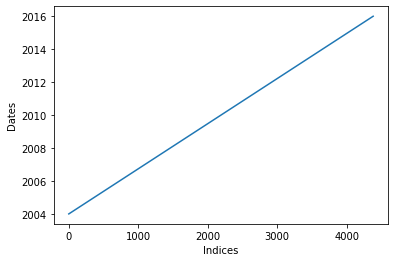

In [16]:
#dates_in_datetime.index
x = [i for i in range(0, len(df))]
y = dates_in_datetime['Date']

plt.plot(x,y)

plt.xlabel("Indices")
plt.ylabel("Dates")

### Valid Format Test

In this case, the values recorded under the no2, so2, spm, rspm field must always be non-negative.

In [17]:
#no2
flag = 0
for i in range(0, len(df['no2'])):
    if(df['no2'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


In [18]:
#so2
flag = 0
for i in range(0, len(df['so2'])):
    if(df['so2'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")


All prices recorded are non negative


In [19]:
#rspm
flag = 0
for i in range(0, len(df['rspm'])):
    if(df['rspm'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


In [20]:
#spm
flag = 0
for i in range(0, len(df['spm'])):
    if(df['spm'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")


All prices recorded are non negative


### Exporting to a csv file

In [21]:
df.to_csv('conc.csv')